In [4]:
#Question1:

# Importing libraries
import numpy as np
import pandas as pd  

url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user"
users = pd.read_csv(url, sep='|', index_col='user_id')

users.head()  # Verifying the dataset


,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213


In [5]:
#mean age per occupation
def mean_age_per_occupation(users):
    return users.groupby('occupation')['age'].mean()
mean_age_result = mean_age_per_occupation(users)
print("\nMean Age per Occupation")
print(mean_age_result)


# Male ratio per occupation with sorting most to least
def male_ratio_per_occupation(users):
    gender_count = users.groupby(['occupation', 'gender']).size()
    male_count = gender_count.loc[:, 'M']
    total_count = gender_count.groupby('occupation').sum()
    ratio = male_count / total_count
    return ratio.sort_values(ascending=False)

male_ratio_result = male_ratio_per_occupation(users)
print("\nMale Ratio per Occupation")
print(male_ratio_result)

# Minimum and maximum ages by occupation
def min_max_age_per_occupation(users):
    return users.groupby('occupation')['age'].agg(['min', 'max'])

min_max_age_result = min_max_age_per_occupation(users)
print("\nMinimum and Maximum Ages by Occupation")
print(min_max_age_result)

# mean age by occupation and sex
def mean_age_per_occupation_sex(users):
    return users.groupby(['occupation', 'gender'])['age'].mean()

mean_age_sex_result = mean_age_per_occupation_sex(users)
print("\nMean Age per Occupation and Sex")
print(mean_age_sex_result)


# percentage of women and men per occupation
def gender_percentage_per_occupation(users):
    gender_count = users.groupby(['occupation', 'gender']).size()
    total_count = gender_count.groupby('occupation').sum()
    percentage = gender_count / total_count * 100
    return percentage

gender_percentage_result = gender_percentage_per_occupation(users)
print("\nGender Percentage per Occupation")
print(gender_percentage_result)


Mean Age per Occupation
occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

Male Ratio per Occupation
occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.65

In [8]:
#Question2:

# Importing pandas library
import pandas as pd

# Reading the Euro 2012 dataset from the given URL and assigning it to the 'euro12' variable
euro12_dataset = pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv")

# Verifying the first few rows of the dataset
print("First few rows of the Euro 2012 dataset:")
print(euro12_dataset.head())


First few rows of the Euro 2012 dataset:
             Team  Goals  Shots on target  Shots off target Shooting Accuracy  \
0         Croatia      4               13                12             51.9%   
1  Czech Republic      4               13                18             41.9%   
2         Denmark      4               10                10             50.0%   
3         England      5               11                18             50.0%   
4          France      3               22                24             37.9%   

  % Goals-to-shots  Total shots (inc. Blocked)  Hit Woodwork  Penalty goals  \
0            16.0%                          32             0              0   
1            12.9%                          39             0              0   
2            20.0%                          27             1              0   
3            17.2%                          40             0              0   
4             6.5%                          65             1              0  

In [7]:
# Extracting the 'Goals' column
goals = euro12['Goals']

# Counting the number of teams that participated
num_participating_teams = euro12['Team'].nunique()
print("Number of participating teams:", num_participating_teams)

# Determining the total number of columns
total_columns = len(euro12.columns)
print("\nTotal number of columns:", total_columns)

# Creating a new DataFrame with 'Team', 'Yellow Cards', and 'Red Cards' columns
discipline_info = euro12[['Team', 'Yellow Cards', 'Red Cards']]
print("\nDiscipline Information:\n", discipline_info)

# Sorting teams by Red Cards and then Yellow Cards
sorted_discipline = discipline_info.sort_values(by=['Red Cards', 'Yellow Cards'], ascending=False)
print("\nSorted Discipline Information:\n", sorted_discipline)

# Calculating the mean of Yellow Cards per team
mean_yellow_cards_per_team = discipline_info['Yellow Cards'].mean()
print("\nMean Yellow Cards per Team:", mean_yellow_cards_per_team)

# Extracting teams that scored more than 6 goals
high_scoring_teams = euro12[euro12['Goals'] > 6]
print("\nTeams that scored more than 6 goals:\n", high_scoring_teams)

# Extracting teams whose names start with 'G'
teams_starting_with_G = euro12[euro12['Team'].str.startswith('G')]
print("\nTeams that start with 'G':\n", teams_starting_with_G)

# Selecting the first 7 columns
first_7_columns = euro12.iloc[:, :7]
print("\nFirst 7 columns:\n", first_7_columns)

# Selecting all columns except the last 3
all_except_last_3_columns = euro12.iloc[:, :-3]
print("\nAll columns except the last 3:\n", all_except_last_3_columns)

# Extracting Shooting Accuracy of England, Italy, and Russia
shooting_accuracy_selection = euro12.loc[euro12['Team'].isin(['England', 'Italy', 'Russia']), ['Team', 'Shooting Accuracy']]
print("\nShooting Accuracy of England, Italy, and Russia:\n", shooting_accuracy_selection)


Number of participating teams: 16

Total number of columns: 35

Discipline Information:
                    Team  Yellow Cards  Red Cards
0               Croatia             9          0
1        Czech Republic             7          0
2               Denmark             4          0
3               England             5          0
4                France             6          0
5               Germany             4          0
6                Greece             9          1
7                 Italy            16          0
8           Netherlands             5          0
9                Poland             7          1
10             Portugal            12          0
11  Republic of Ireland             6          1
12               Russia             6          0
13                Spain            11          0
14               Sweden             7          0
15              Ukraine             5          0

Sorted Discipline Information:
                    Team  Yellow Cards  Red Ca

In [9]:
#Question3:

import pandas as pd
import numpy as np

# Random series creation: 1, 2, 3
s1 = pd.Series(np.random.randint(1, 5, 100))
s2 = pd.Series(np.random.randint(1, 4, 100))
s3 = pd.Series(np.random.randint(10000, 30001, 100))

# Concatenate the series into the 'housing' DataFrame
housing = pd.concat([s1, s2, s3], axis=1)

# Rename the columns
housing.columns = ['bedrs', 'bathrs', 'price_sqr_meter']
print("\nHousing:\n", housing)

# Concatenate series into 'bigcolumn'
bigcolumn = pd.concat([s1, s2, s3], ignore_index=True)
print("\nBig Column:\n", bigcolumn)

# Check if the index of 'bigcolumn' goes only until 99
print("\nIs it true that 'bigcolumn' goes only until index 99?", bigcolumn.index.max() == 99)

# Reindex 'bigcolumn' from 0 to 299
bigcolumn = bigcolumn.reset_index(drop=True)



Housing:
     bedrs  bathrs  price_sqr_meter
0       1       2            26210
1       1       3            11284
2       4       2            25412
3       3       2            10992
4       4       2            24589
..    ...     ...              ...
95      4       2            26882
96      1       3            24095
97      1       2            10085
98      2       1            19351
99      4       3            14082

[100 rows x 3 columns]

Big Column:
 0          1
1          1
2          4
3          3
4          4
       ...  
295    26882
296    24095
297    10085
298    19351
299    14082
Length: 300, dtype: int32

Is it true that 'bigcolumn' goes only until index 99? False


In [12]:
#Question4:

import pandas as pd
import numpy as np

# Creating a DataFrame with random data for illustration purposes
np.random.seed(42)  # Setting seed for reproducibility
date_rng = pd.date_range(start='2022-01-01', end='2022-12-31', freq='D')
data = pd.DataFrame({
    'Location1': np.random.rand(len(date_rng)),
    'Location2': np.random.rand(len(date_rng)),
    'Location3': np.random.rand(len(date_rng))
}, index=date_rng)

# Finding missing values
missing_values_per_location = data.isnull().sum()
print("\nMissing values per location:")
print(missing_values_per_location)

# Computing non-missing values
non_missing_values_count = data.count().sum()
print("\nNon-missing values count:")
print(non_missing_values_count)

# Calculating the mean windspeeds of all locations and times
mean_windspeed = data.stack().mean()
print("\nMean windspeed over all locations and times:")
print(mean_windspeed)

# Creating a new dataframe 'loc_stats' with statistics for each location
loc_stats = pd.DataFrame({
    'min': data.min(),
    'max': data.max(),
    'mean': data.mean(),
    'std': data.std()
})
print("\nLocation Stats - Min, Max, Mean, and Std for each location:")
print(loc_stats)

# Creating a new dataframe 'day_stats' with statistics for each day
day_stats = pd.DataFrame({
    'min': data.min(axis=1),
    'max': data.max(axis=1),
    'mean': data.mean(axis=1),
    'std': data.std(axis=1)
})
print("\nDay Stats - Min, Max, Mean, and Std for each day:")
print(day_stats)

# Calculating average windspeed in January for each location
january_average = data[data.index.month == 1].mean()
print("\nAverage windspeed for each location in January:")
print(january_average)

# Downsampling to yearly frequency for each location
yearly_data = data.resample('Y').mean()
print("\nYearly frequency for each location:")
print(yearly_data)

# Downsampling to monthly frequency for each location
monthly_data = data.resample('M').mean()
print("\nMonthly frequency for each location:")
print(monthly_data)

# Downsampling to weekly frequency for each location
weekly_data = data.resample('W-Mon').mean()
print("\nWeekly frequency for each location:")
print(weekly_data)

# Calculating min, max, mean windspeeds, and standard deviations for the first 52 weeks
weekly_allstats = data.resample('W-Mon').agg(['min', 'max', 'mean', 'std']).head(52)
print("\nWeekly stats for the first 52 weeks:")
print(weekly_allstats)



Missing values per location:
Location1    0
Location2    0
Location3    0
dtype: int64

Non-missing values count:
1095

Mean windspeed over all locations and times:
0.4948642349103015

Location Stats - Min, Max, Mean, and Std for each location:
                min       max      mean       std
Location1  0.005062  0.990054  0.491547  0.291071
Location2  0.010838  0.999718  0.494642  0.300637
Location3  0.004632  0.997934  0.498404  0.290433

Day Stats - Min, Max, Mean, and Std for each day:
                 min       max      mean       std
2022-01-01  0.164266  0.386103  0.308303  0.124874
2022-01-02  0.814575  0.961191  0.908827  0.081792
2022-01-03  0.665197  0.905351  0.767514  0.123954
2022-01-04  0.195791  0.598658  0.439172  0.214136
2022-01-05  0.069361  0.358830  0.194737  0.148568
...              ...       ...       ...       ...
2022-12-27  0.388170  0.942732  0.724243  0.295389
2022-12-28  0.139772  0.649647  0.477569  0.292558
2022-12-29  0.458253  0.795267  0.620419  0.

In [13]:
#Question5:

import pandas as pd

# Reading the dataset from the given URL and assigning it to the variable 'chipo'
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
chipo = pd.read_csv(url, sep='\t')

# Displaying the first 10 rows of the dataset
print("First 10 lines of the dataset:")
print(chipo.head(10))

# Calculating the number of observations (rows) in the dataset
num_observations = len(chipo)
print(f"\nNumber of observations: {num_observations}")

# Calculating the number of columns in the dataset
num_columns = chipo.shape[1]
print(f"\nNumber of columns: {num_columns}")

# Displaying the column names
print("\nColumns:", chipo.columns)

# Displaying the index information
print("\nIndex:", chipo.index)

# Finding the most ordered item
most_ordered_item = chipo['item_name'].value_counts().idxmax()
print(f"\nMost-ordered item: {most_ordered_item}")

# Calculating the quantity ordered for the most-ordered item
quantity_ordered = chipo[chipo['item_name'] == most_ordered_item]['quantity'].sum()
print(f"\nQuantity ordered for the most-ordered item: {quantity_ordered}")

# Finding the most ordered item in choice_description
most_ordered_choice = chipo['choice_description'].value_counts().idxmax()
print(f"\nMost-ordered item in choice_description: {most_ordered_choice}")

# Calculating the total number of items ordered
total_items_ordered = chipo['quantity'].sum()
print(f"\nTotal items ordered: {total_items_ordered}")

# Converting the 'item_price' column to float using a lambda function
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))
print("\nItem price type:", chipo['item_price'].dtype)

# Calculating the total revenue for the period
revenue = (chipo['quantity'] * chipo['item_price']).sum()
print(f"\nRevenue for the period: ${revenue:.2f}")

# Calculating the number of unique orders made
num_orders = chipo['order_id'].nunique()
print(f"\nNumber of orders made: {num_orders}")

# Calculating the average revenue amount per order
avg_revenue_per_order = revenue / num_orders
print(f"\nAverage revenue amount per order: ${avg_revenue_per_order:.2f}")

# Calculating the number of different items sold
num_different_items = chipo['item_name'].nunique()
print(f"\nNumber of different items sold: {num_different_items}")


First 10 lines of the dataset:
   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   


   Year  Marriages  Divorces  Population  Marriages_per_1000  \
0  1867   357000.0   10000.0    36970000                 9.7   
1  1868   345000.0   10000.0    37885000                 9.1   
2  1869   348000.0   11000.0    38870000                 9.0   
3  1870   352000.0   11000.0    39905000                 8.8   
4  1871   359000.0   12000.0    41010000                 8.8   

   Divorces_per_1000  
0                0.3  
1                0.3  
2                0.3  
3                0.3  
4                0.3  


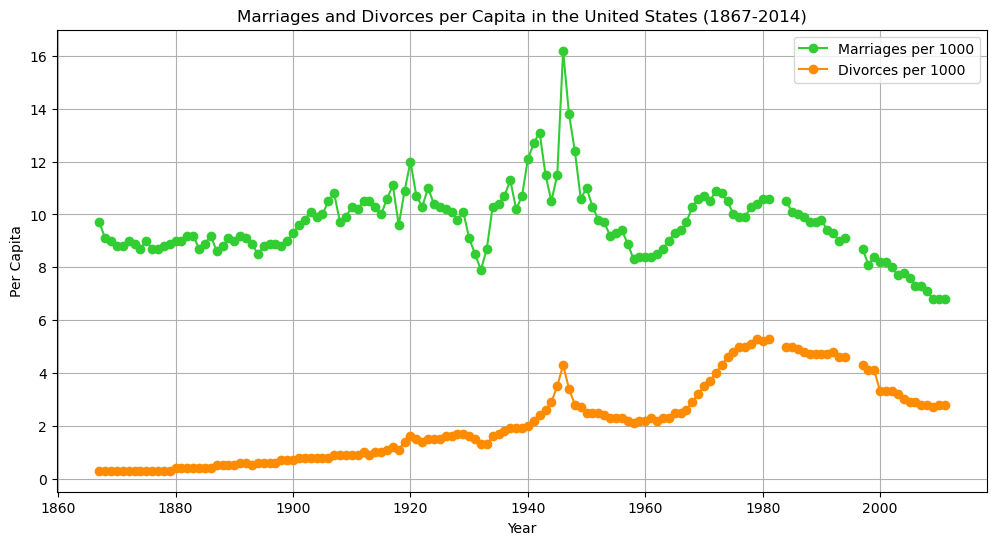

In [23]:
#Question6:

import pandas as pd
import matplotlib.pyplot as plt

# Loading the CSV with a raw string
df = pd.read_csv(r"C:\Users\prade\Documents\programming\us-marriages-divorces-1867-2014.csv")

# Check the first few rows of the DataFrame
print(df.head())

# Creating a line plot with a specified figure size
plt.figure(figsize=(12, 6))

# Plotting the line for Marriages per 1000 with a different color (green)
plt.plot(df['Year'], df['Marriages_per_1000'], 
         label='Marriages per 1000', color='limegreen', marker='o')

# Plotting the line for Divorces per 1000 with a different color (orange)
plt.plot(df['Year'], df['Divorces_per_1000'], 
         label='Divorces per 1000', color='darkorange', marker='o')

# Adding labels, title, and legend
plt.xlabel('Year')
plt.ylabel('Per Capita')
plt.title('Marriages and Divorces per Capita in the United States (1867-2014)')
plt.legend()

# Adding grid lines
plt.grid(True)

# Displaying the line plot
plt.show()


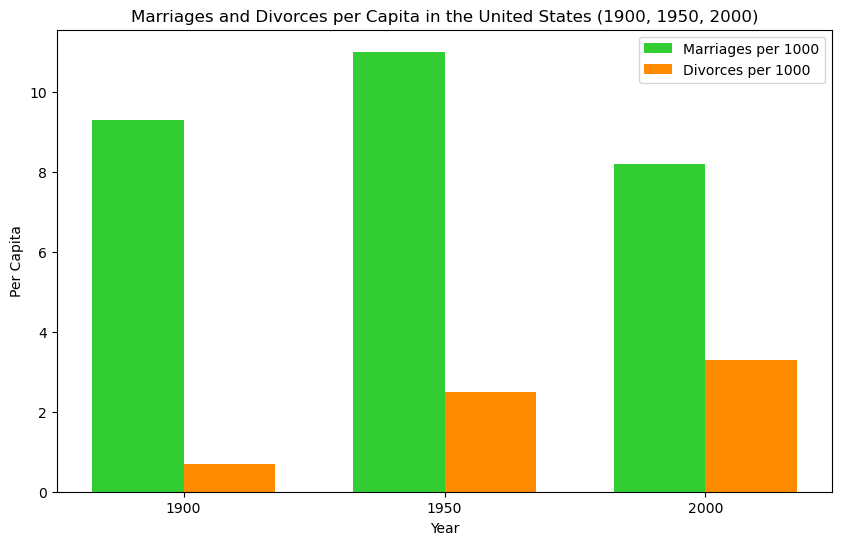

In [31]:
#Question7:

import pandas as pd

# Loading the CSV file with a raw string
df = pd.read_csv(r"C:\Users\prade\Documents\programming\us-marriages-divorces-1867-2014.csv")

# Selecting specific years (1900, 1950, 2000) for analysis
selected_years = data[data['Year'].isin([1900, 1950, 2000])]

# Setting up the figure and axes for the bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Bar positions for marriages and divorces
bar_width = 0.35
marriage_positions = range(len(selected_years))
divorce_positions = [pos + bar_width for pos in marriage_positions]

# Bar heights for marriages and divorces
marriage_heights = selected_years['Marriages_per_1000']
divorce_heights = selected_years['Divorces_per_1000']

# Creating vertical bar chart for marriages with a different color (green)
ax.bar(marriage_positions, marriage_heights, width=bar_width, label='Marriages per 1000', color='limegreen')

# Creating vertical bar chart for divorces with a different color (orange)
ax.bar(divorce_positions, divorce_heights, width=bar_width, label='Divorces per 1000', color='darkorange')

# Adding labels, title, ticks, and legend
ax.set_xlabel('Year')
ax.set_ylabel('Per Capita')
ax.set_title('Marriages and Divorces per Capita in the United States (1900, 1950, 2000)')
ax.set_xticks([pos + bar_width / 2 for pos in marriage_positions])
ax.set_xticklabels(selected_years['Year'])
ax.legend()

# Displaying the bar chart
plt.show()


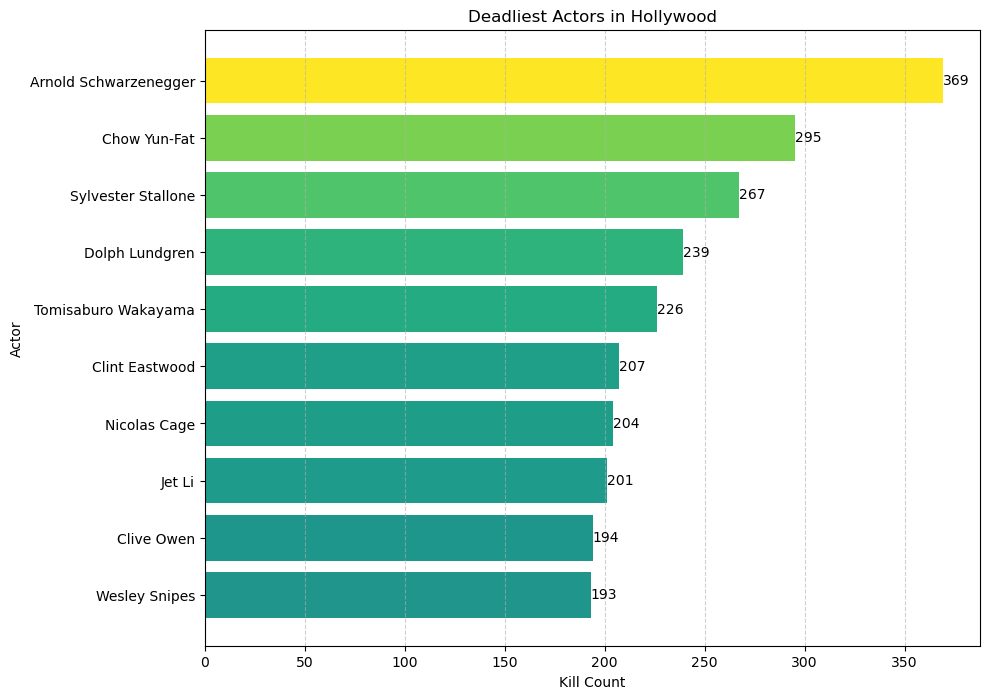

In [30]:
#Question8:

import pandas as pd

# Loading the CSV file with a raw string
df = pd.read_csv(r"C:\Users\prade\Documents\programming\actor_kill_counts.csv")

# Sorting the data by the Kill Count column in ascending order
df_sorted = df.sort_values(by='Count', ascending=True)

# Creating a horizontal bar chart with a specified figure size
plt.figure(figsize=(10, 8))

# Plotting horizontal bars with unique color for each bar (viridis colormap)
bars = plt.barh(df_sorted['Actor'], df_sorted['Count'], color=plt.cm.viridis(df_sorted['Count'] / df_sorted['Count'].max()))

# Adding labels and title
plt.xlabel('Kill Count')
plt.ylabel('Actor')
plt.title('Deadliest Actors in Hollywood')

# Adding grid lines for better readability
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Labeling each bar with the actor's kill count
for bar, value in zip(bars, df_sorted['Count']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, str(value), ha='left', va='center', fontsize=10)

# Show the horizontal bar chart
plt.show()


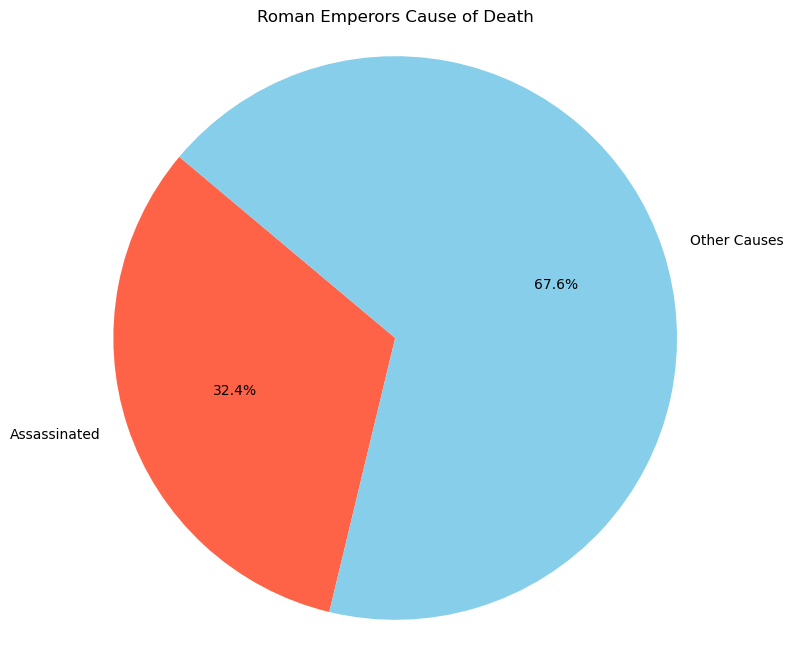

In [36]:
#Question9:

import pandas as pd
import matplotlib.pyplot as plt

# Specify the file path using a raw string
file_path = r"C:\Users\prade\Documents\programming\roman-emperor-reigns.csv"

# Load the dataset
df = pd.read_csv(file_path)

# Filter assassinated emperors
assassinated_emperors = df[df['Cause_of_Death'] == 'Assassinated']

# Calculate the percentage of assassinated emperors
assassinated_percentage = (len(assassinated_emperors) / len(df)) * 100

# Calculate the percentage of emperors who died from other causes
other_percentage = 100 - assassinated_percentage

# Define labels, sizes, and colors for the pie chart
labels = ['Assassinated', 'Other Causes']
sizes = [assassinated_percentage, other_percentage]
colors = ['#FF6347', '#87CEEB']  # Red for Assassinated, Light Blue for Other Causes

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Add title and ensure equal aspect ratio for a circular pie chart
plt.title('Roman Emperors Cause of Death')
plt.axis('equal')

# Show the pie chart
plt.show()


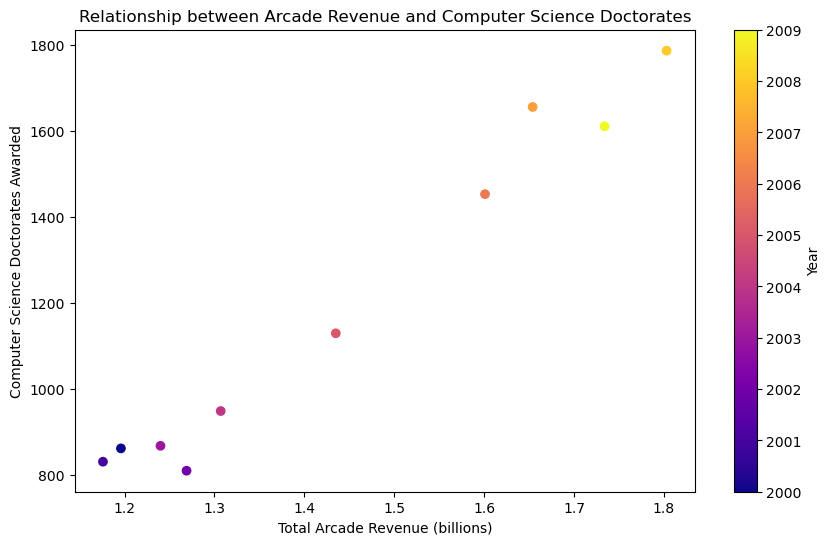

In [39]:
#Question10:

import pandas as pd
import matplotlib.pyplot as plt

# Specify the file path using a raw string
data_file_path = r"C:\Users\prade\Documents\programming\arcade-revenue-vs-cs-doctorates.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(data_file_path)

# Create a scatter plot with a specified figure size
plt.figure(figsize=(10, 6))

# Scatter plot with color based on the Year using the 'plasma' colormap
scatter_plot = plt.scatter(df['Total Arcade Revenue (billions)'], 
                            df['Computer Science Doctorates Awarded (US)'], 
                            c=df['Year'], cmap='plasma')

# Adding labels and title to the plot
plt.xlabel('Total Arcade Revenue (billions)')
plt.ylabel('Computer Science Doctorates Awarded')
plt.title('Relationship between Arcade Revenue and Computer Science Doctorates')

# Add a colorbar to the scatter plot
color_bar = plt.colorbar(scatter_plot)
color_bar.set_label('Year')

# Show the scatter plot
plt.show()
